In [1]:
%load_ext autoreload
%autoreload 2
import os
os.chdir('../')

In [35]:
import pickle5 as pkl
from utils.utils import *
from utils.metrics import *
import matplotlib.pyplot as plt
import numpy as np
from SHDataset import SHDataset
import random

with open('./experimental_results/results_noise_exp_seed42/noise_exp_seed42_nonoise/quantitative_results.hdf5', 'rb') as handle:
    res = pkl.load(handle)
    
np.random.seed(42)
random.seed(42)

dataset = SHDataset(noise=False, noise_config=1)
G1,T1,G2,T2 = dataset.read_snapshots(0, bbox=(52.34, 52.36, 4.895, 4.93))
gt_labels = groundtruth_labels(G1, G2)

In [36]:
from models.histogram import HistogramDetector
hist_det = HistogramDetector(G1, (52.34, 52.36, 4.895, 4.93), hist_dims=(500,500), 
                            score_calc_method='intersect', accumulate_scores_hist=False)
G2_pred_hist = hist_det.forward(T2['T'])
scores_hist = predicted_labels(G2_pred_hist)

Running Histogram Change Detector: 100%|██████████████████████████████████████████████████████████████████████████████████| 34960/34960 [00:26<00:00, 1307.49it/s]


fscore: 0.8764044943820225


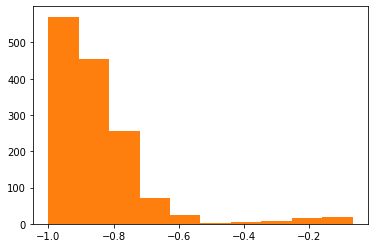

In [37]:
# scores_hist = res['results']['histogram']['scores']
plt.hist(list(scores_hist.values()))

# t = -0.4
t = hist_det.find_threshold()
pred_hist = {k: 0 if scores_hist[k] < t else 1 for k in gt_labels}
fscore_hist = fscore(gt_labels, pred_hist)
print(f'fscore: {fscore_hist}')

In [38]:
from models.histogram import HistogramDetector
hist_det = HistogramDetector(G1, (52.34, 52.36, 4.895, 4.93), hist_dims=(800,800), 
                            score_calc_method='intersect', accumulate_scores_hist=False)
G2_pred_hist = hist_det.forward(T2['T'])
scores_hist = predicted_labels(G2_pred_hist)

Running Histogram Change Detector: 100%|██████████████████████████████████████████████████████████████████████████████████| 34960/34960 [00:31<00:00, 1097.14it/s]


fscore: 0.8297872340425533


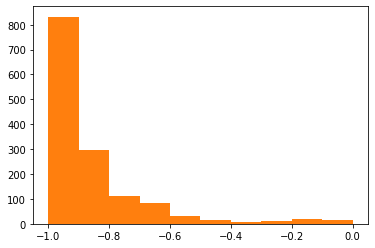

In [39]:
# scores_hist = res['results']['histogram']['scores']
plt.hist(list(scores_hist.values()))

# t = -0.4
t = hist_det.find_threshold()
pred_hist = {k: 0 if scores_hist[k] < t else 1 for k in gt_labels}
fscore_hist = fscore(gt_labels, pred_hist)
print(f'fscore: {fscore_hist}')

In [11]:
from SHDataset import SHDataset

dataset = SHDataset(noise=False, noise_config=1)
G1,T1,G2,T2 = dataset.read_snapshots(0, bbox=(52.34, 52.36, 4.895, 4.93))

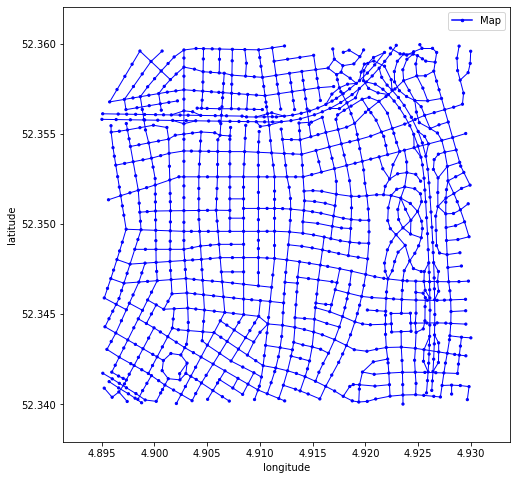

In [3]:
from utils.utils import *

plot_graph(G1, show_nodes=True)

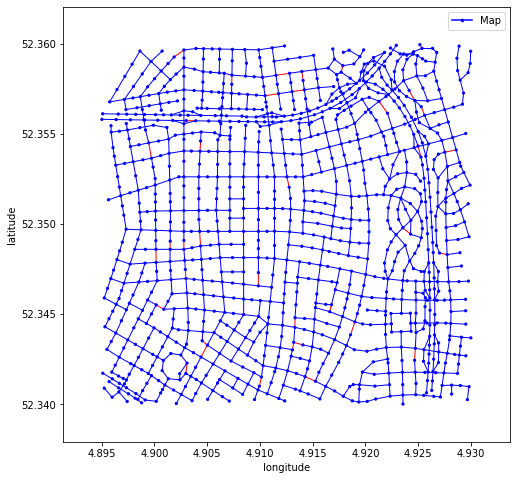

In [4]:

_, G12_d, _, _ = compare_snapshots(G1,G2)
plot_graph(G12_d, figsize=(8,8), show_nodes=True)

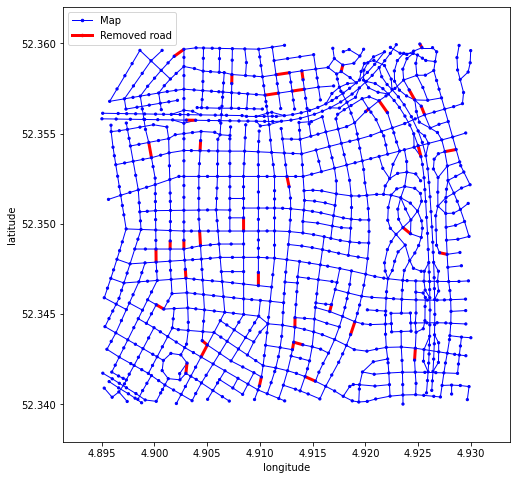

In [8]:

_, G12_d, _, _ = compare_snapshots(G1,G2)
plot_graph(G12_d, figsize=(8,8), show_nodes=True, removed_road_edge_width=3)

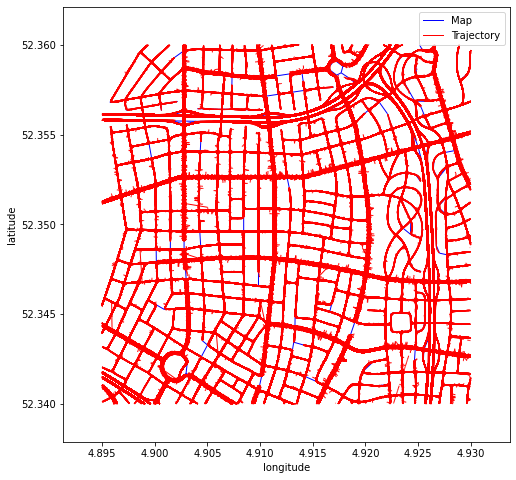

In [12]:

plot_graph(snapshot_to_nxgraph(G1,T2['T']), figsize=(8,8))